shapefiles from https://www.census.gov/geo/maps-data/data/cbf/cbf_cds.html for district, county files also on this site

In [11]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import random

import seaborn as sns

In [1]:
sah_df = pd.read_csv('sahie_clean.csv')

sah_df['c_s_fips'] = sah_df['statefips'] + sah_df['countyfips']

NameError: name 'pd' is not defined

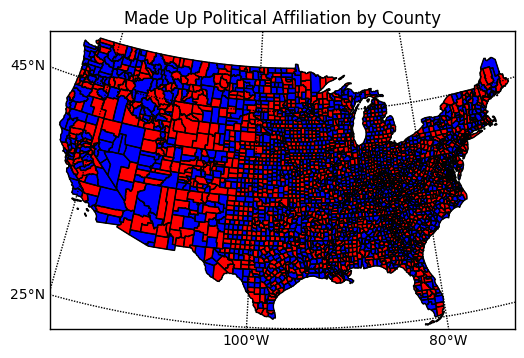

In [2]:
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# lat_1,2 - lon_0 -- center

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/Users/nickybangs/ds/metis/mcnulty/data/2016-us-election/county_shapefiles/cb_2015_us_county_20m','counties',drawbounds=True)
# lat_

statenames = []

for shapedict in m.counties_info:
    statenames.append(shapedict['NAME'])

ax = plt.gca()

for nshape,seg in enumerate(m.counties):
# skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        poly = Polygon(seg,facecolor=random.choice(['r','b']),edgecolor='black')
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Made Up Political Affiliation by County')
plt.show()

In [3]:
print(m.counties_info)

[{'COUNTYNS': '00485050', 'COUNTYFP': '175', 'NAME': 'Seward', 'SHAPENUM': 1, 'RINGNUM': 1, 'LSAD': '06', 'STATEFP': '20', 'AFFGEOID': '0500000US20175', 'GEOID': '20175', 'AWATER': 2777350, 'ALAND': 1655865960}, {'COUNTYNS': '00695791', 'COUNTYFP': '141', 'NAME': 'Tishomingo', 'SHAPENUM': 2, 'RINGNUM': 1, 'LSAD': '06', 'STATEFP': '28', 'AFFGEOID': '0500000US28141', 'GEOID': '28141', 'AWATER': 52359814, 'ALAND': 1098939230}, {'COUNTYNS': '00974148', 'COUNTYFP': '101', 'NAME': 'Steuben', 'SHAPENUM': 3, 'RINGNUM': 1, 'LSAD': '06', 'STATEFP': '36', 'AFFGEOID': '0500000US36101', 'GEOID': '36101', 'AWATER': 34993606, 'ALAND': 3601566799}, {'COUNTYNS': '01461763', 'COUNTYFP': '013', 'NAME': 'Grand Isle', 'SHAPENUM': 4, 'RINGNUM': 1, 'LSAD': '06', 'STATEFP': '50', 'AFFGEOID': '0500000US50013', 'GEOID': '50013', 'AWATER': 292303559, 'ALAND': 211894597}, {'COUNTYNS': '00066860', 'COUNTYFP': '065', 'NAME': 'Izard', 'SHAPENUM': 5, 'RINGNUM': 1, 'LSAD': '06', 'STATEFP': '05', 'AFFGEOID': '0500000US

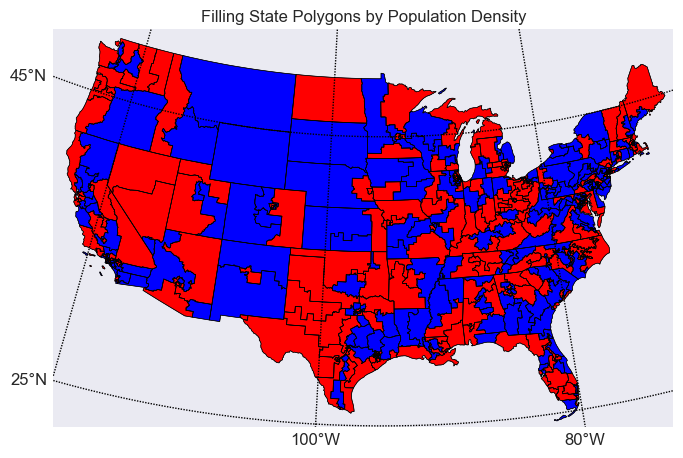

In [8]:
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/Users/nickybangs/ds/metis/mcnulty/data/2016-us-election/district_shapefiles/cb_2015_us_cd114_20m','counties',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

statenames = []

for shapedict in m.counties_info:
    statenames.append(shapedict['AFFGEOID'])

ax = plt.gca()

for nshape,seg in enumerate(m.counties):
# skip DC and Puerto Rico.
    poly = Polygon(seg,facecolor=random.choice(['r','b']),edgecolor='black')
    ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Filling State Polygons by Population Density')
plt.show()